# Project on Machine Learning using Python
To predict the price of bosten house

# Importing Required Libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Loading Dataset and Data Preprocessing

In [97]:
boston=load_boston()

In [98]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [99]:
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['target'])


In [100]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [101]:
print(y)

     target
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
..      ...
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9

[506 rows x 1 columns]


In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [103]:
x['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [104]:
df_boston=x.copy(deep=False)

In [105]:
df_boston.insert(10,"target",boston.target)


In [106]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,24.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,21.6,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,34.7,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,33.4,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,36.2,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,22.4,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,20.6,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,23.9,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,22.0,21.0,393.45,6.48


In [107]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [108]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,22.532806,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,9.197104,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,5.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.025000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,21.200000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,25.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,50.000000,22.000000,396.900000,37.970000


In [109]:
df_boston.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,target,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,22.53,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,9.20,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,5.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.02,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,21.20,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,25.00,20.20,396.22,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,50.00,22.00,396.90,37.97


# Data Visualization

In [110]:
corr=df_boston.corr('pearson')

In [111]:
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   
PTRATIO  0.289946 -0.391679 

In [112]:
# obtain absolut value of correlations
corrs=[corr[attr]['target'] for attr in list(df_boston)]

In [113]:
l=list(zip(corrs, list(x)))

In [114]:
l.sort(key=lambda x:x[0], reverse=True)
l

[(1.0, 'PTRATIO'),
 (0.6953599470715389, 'RM'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'LSTAT'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS'),
 (-0.3769545650045959, 'AGE'),
 (-0.3816262306397776, 'RAD'),
 (-0.3883046085868114, 'CRIM'),
 (-0.4273207723732817, 'NOX'),
 (-0.46853593356776646, 'TAX'),
 (-0.483725160028373, 'INDUS'),
 (-0.507786685537561, 'B')]

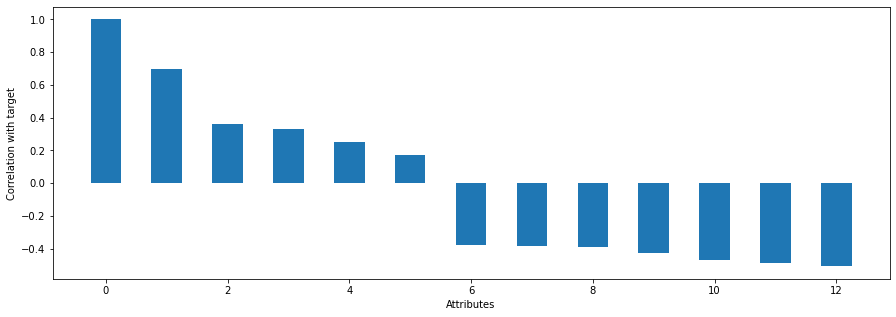

In [115]:
corrs,labels=list(zip(*l))
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target')
plt.show()

# Normalizing data

In [116]:
from sklearn import preprocessing

In [117]:
standardscaler=preprocessing.StandardScaler()
x_scalar=standardscaler.fit_transform(x)
x_scalar

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [119]:
y_scalar=standardscaler.fit_transform(y)
print(y_scalar)

[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]
 [ 0.6712218 ]
 [ 0.03996443]
 [ 0.49708184]
 [-0.65659542]
 [-0.39538548]
 [-0.81985164]
 [-0.39538548]
 [-0.09064054]
 [-0.23212926]
 [-0.47157171]
 [-0.286548  ]
 [ 0.06173193]
 [-0.54775795]
 [-0.25389676]
 [-0.47157171]
 [-0.97222411]
 [-0.31919924]
 [-0.79808414]
 [-0.87427038]
 [-0.75454915]
 [-0.93957286]
 [-0.64571167]
 [-0.84161913]
 [-0.44980422]
 [-0.16682677]
 [-1.07017784]
 [-0.87427038]
 [-1.0157591 ]
 [-1.02664285]
 [-0.98310786]
 [-0.39538548]
 [-0.27566425]
 [-0.16682677]
 [ 0.23587189]
 [ 0.89978051]
 [ 1.34601416]
 [ 0.4426631 ]
 [ 0.30117438]
 [ 0.23587189]
 [-0.14505928]
 [-0.35185049]
 [-0.27566425]
 [-0.64571167]
 [-0.88515413]
 [-0.34096674]
 [-0.30831549]
 [-0.22124551]
 [ 0.26852314]
 [ 0.09438317]
 [-0.39538548]
 [ 1.4004329 ]
 [ 0.23587189]
 [ 0.98685049]
 [ 0.08349942]
 [-0.31919924]
 [-0.41715297]
 [-0.71101416]
 [-0.0362218 ]
 [ 0.26852314]
 [ 1.13922296]
 [ 0.10526692]
 [-0.34096

# Splitting the data

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y_scalar,test_size=0.2)

In [79]:
print(x_test)
len(x_test)

[[-0.40034877 -0.48772236 -0.21109853 ...  0.34421334  0.44105193
  -0.09014061]
 [ 0.0097086  -0.48772236  1.01599907 ...  0.80657583 -0.44563573
   0.18880522]
 [-0.26424679 -0.48772236  1.2319449  ... -1.73641788 -0.03052512
  -0.87231032]
 ...
 [-0.41077698  1.4436582  -1.12303194 ... -1.50523663  0.44105193
  -1.01809105]
 [-0.40520503 -0.48772236 -0.16440754 ... -0.30309415  0.40158024
  -0.08593539]
 [ 0.82139445 -0.48772236  1.01599907 ...  0.80657583 -3.43857663
   1.58773958]]


102

In [80]:
print(y_test)
len(y_test)

[[-0.07975679]
 [-0.06887304]
 [ 0.1923369 ]
 [-0.30831549]
 [ 0.61680306]
 [ 0.07261568]
 [ 1.34601416]
 [ 0.06173193]
 [ 0.4208956 ]
 [-0.80896789]
 [ 0.01819694]
 [ 2.23848148]
 [-0.93957286]
 [-0.41715297]
 [-1.57083023]
 [ 1.48750288]
 [-0.79808414]
 [-1.30962029]
 [-0.81985164]
 [ 0.14880191]
 [-0.34096674]
 [-0.2647805 ]
 [ 2.98946007]
 [ 0.03996443]
 [-0.83073539]
 [-0.23212926]
 [ 0.00731319]
 [ 0.23587189]
 [-0.33008299]
 [-0.35185049]
 [ 2.33643521]
 [ 0.08349942]
 [-0.14505928]
 [ 1.03038548]
 [ 0.22498815]
 [-0.0579893 ]
 [-0.35185049]
 [-0.09064054]
 [ 0.09438317]
 [ 0.64945431]
 [-1.34227153]
 [-0.70013041]
 [ 2.8588551 ]
 [ 0.48619809]
 [-0.55864169]
 [ 1.13922296]
 [-0.75454915]
 [ 0.12703442]
 [-0.35185049]
 [ 0.09438317]
 [-0.09064054]
 [ 2.82620386]
 [-0.95045661]
 [ 0.60591932]
 [-0.98310786]
 [-0.17771052]
 [-0.35185049]
 [ 2.80443636]
 [-0.42803672]
 [-0.47157171]
 [ 1.07392047]
 [-0.18859427]
 [ 2.98946007]
 [-1.41845777]
 [-0.0579893 ]
 [ 0.29029063]
 [-0.27566

102

In [81]:
len(x_train)

404

In [82]:
len(y_train)

404

# Testing Data

In [83]:
from sklearn import linear_model

In [84]:
reg=linear_model.LinearRegression()

In [85]:
reg.fit(x_train,y_train,)

LinearRegression()

In [86]:
reg.coef_

array([[-0.06854169,  0.11013541,  0.04414221,  0.08465894, -0.25339457,
         0.31289064, -0.04016763, -0.35301417,  0.27849319, -0.24470615,
        -0.22329065,  0.09639126, -0.36285574]])

In [87]:
y_predict_scaled=reg.predict(x_test)

In [88]:
y_predict_scaled

array([[-0.21182367],
       [-0.86965957],
       [ 0.6513617 ],
       [-0.91539314],
       [ 1.08358725],
       [ 0.33644346],
       [ 0.81368209],
       [ 0.24941649],
       [ 0.73728827],
       [-0.63453892],
       [ 0.22842181],
       [ 1.53072299],
       [-0.46233861],
       [-0.54094721],
       [-1.99480631],
       [ 0.58356736],
       [-1.15353292],
       [-1.03642003],
       [-0.3923169 ],
       [ 0.45956879],
       [ 0.31907214],
       [-0.39148856],
       [ 2.14837077],
       [ 0.27198556],
       [-0.5756919 ],
       [-0.35317924],
       [ 0.48893931],
       [ 0.20080673],
       [-0.58168298],
       [-0.26169413],
       [ 1.63793331],
       [ 0.52532567],
       [ 0.07654628],
       [ 1.22923468],
       [ 0.66728657],
       [ 0.36550384],
       [-0.13702572],
       [-0.17712127],
       [ 0.19523095],
       [ 1.20015323],
       [-0.58255942],
       [-0.40365228],
       [ 1.96132959],
       [ 1.10273006],
       [-0.52820656],
       [ 0

In [89]:
msq_err=mean_squared_error(reg.predict(x_train),y_train)

In [90]:
msq_err

0.2273800336795337

In [91]:
gen_err=mean_squared_error(reg.predict(x_test),y_test)

In [92]:
gen_err

0.3974801218885576

In [93]:
y_predict=standardscaler.inverse_transform(y_predict_scaled)

In [94]:
y_predict

array([[20.58656802],
       [14.54236414],
       [28.51752511],
       [14.12216356],
       [32.48881852],
       [25.62405267],
       [30.00892677],
       [24.82444793],
       [29.30701947],
       [16.7026554 ],
       [24.63154855],
       [36.59710678],
       [18.28483384],
       [17.56257707],
       [ 4.20450296],
       [27.89462993],
       [11.93413251],
       [13.0101671 ],
       [18.92819409],
       [26.75532967],
       [25.46444484],
       [18.93580492],
       [42.27206176],
       [25.03181276],
       [17.24334253],
       [19.28779143],
       [27.02518635],
       [24.3778209 ],
       [17.18829642],
       [20.12835762],
       [37.58215653],
       [27.3595046 ],
       [23.23611441],
       [33.82702877],
       [28.66384306],
       [25.89105987],
       [21.27381247],
       [20.90541408],
       [24.32659052],
       [33.55982808],
       [17.18024365],
       [18.82404454],
       [40.55352523],
       [32.66470283],
       [17.67963838],
       [23

In [95]:
#Showing target and predicted valuse of test test
p_value=pd.DataFrame(list(zip(y_test,y_predict_scaled)), columns=['target','predicted'])

In [71]:
p_value

,target,predicted
0,[-0.9178053687192381],[-0.5404720953997091]
1,[-0.43892046763732795],[-0.33228444468329976]
2,[-0.700130413682006],[-0.018859074069298494]
3,[-0.23212926035195783],[-0.14998292254001125]
4,[0.21410439747436766],[-0.17590388391472067]
...,...,...
97,[-0.34096673787057374],[0.38152775639937836]
98,[1.509270379945897],[1.0815342744120138]
99,[-0.05798929632217219],[0.4974005265551354]
100,[-0.03622180081844908],[0.14119692667089118]
